In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train=pd.read_csv('data/house-prices/train.csv')
test=pd.read_csv('data/house-prices/test.csv')

In [8]:
test.shape[0]+train.shape[0]

2919

In [12]:
df=pd.concat([train,test],axis=0)
df.to_csv('data/house-prices/df.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
(train.isna().sum()*100/1460).sort_values(ascending=False).head(10)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
FireplaceQu    47.260274
LotFrontage    17.739726
GarageYrBlt     5.547945
GarageCond      5.547945
GarageType      5.547945
dtype: float64

In [7]:
columns_dropped_due_to_missing_values=['Id','PoolQC',
'MiscFeature'   ,
'Alley'          ,
'Fence'          ,
'MasVnrType'     ,
'FireplaceQu']

In [8]:
train.drop(columns=columns_dropped_due_to_missing_values,inplace=True)

test.drop(columns=columns_dropped_due_to_missing_values,inplace=True)

In [9]:
columns=train.columns
len(columns)

74

# seperate numnerical columns

In [10]:
cat_col=[]
for col in columns:
    if train[col].dtype=='object':
        cat_col.append(col)

len(cat_col)

37

In [11]:
num_col=[i for i in columns if i not in cat_col]
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
y_train=train['SalePrice']
X_train=train.iloc[:,:-1]
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [13]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [14]:
num_col.remove('SalePrice')

# Univariate

In [15]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


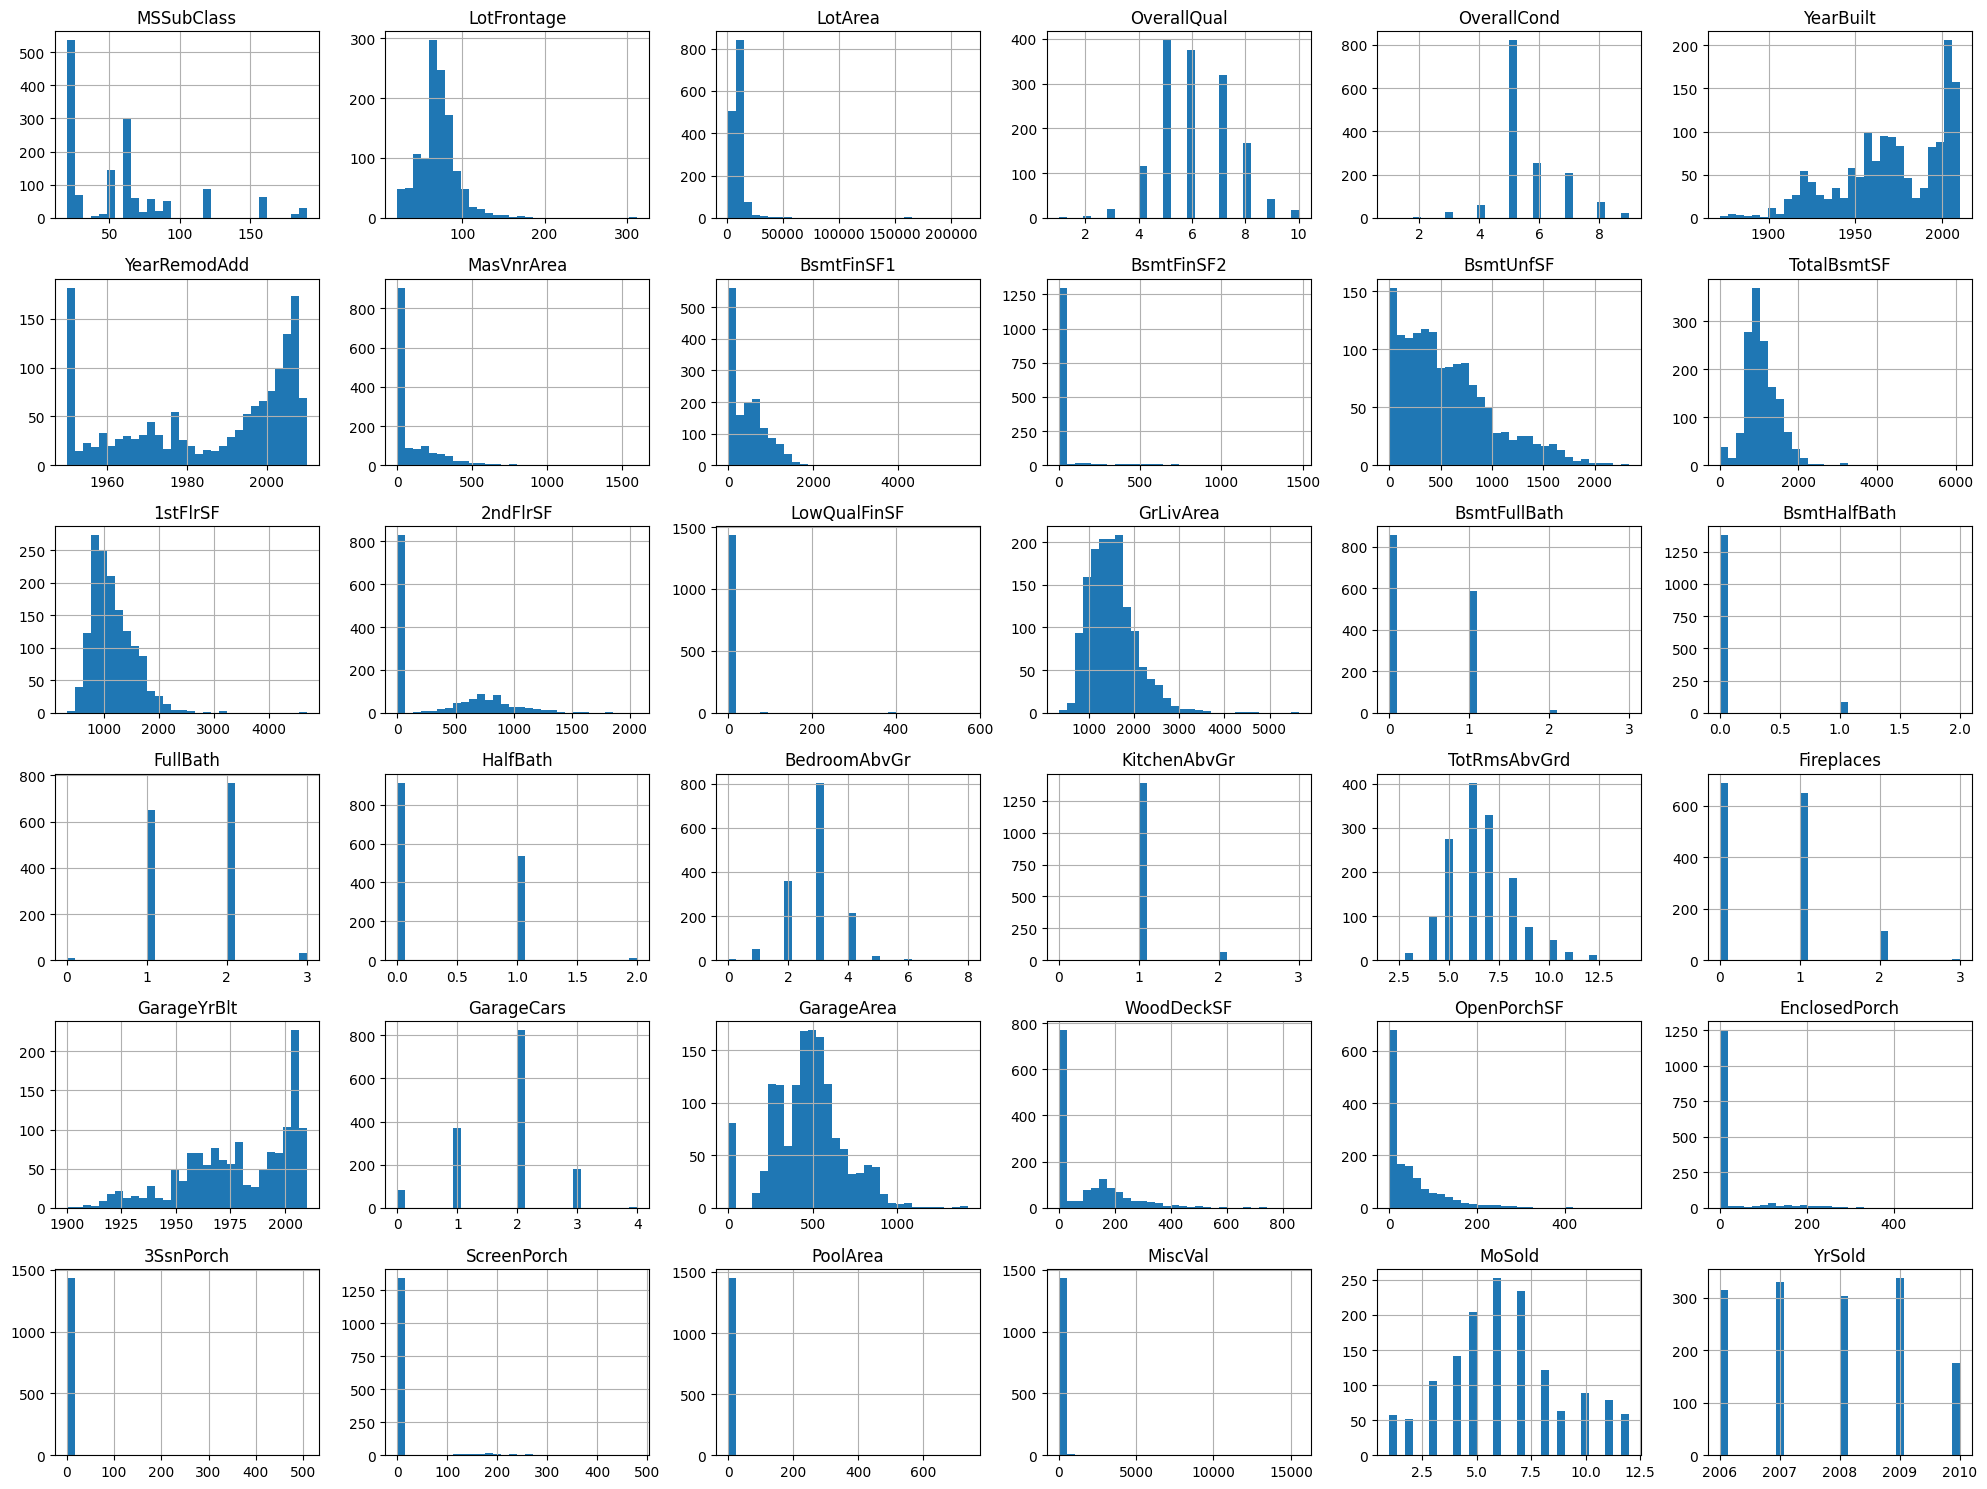

In [16]:
X_train[num_col].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

In [17]:
def select(col):
    col_dict={}
    for i,col in enumerate(col):
        col_dict[i]=col
    
        print(i,col_dict[i])
    
    deleting_columns=list(map(int,input().split(' ')))
    return deleting_columns

select(columns)

0 MSSubClass
1 MSZoning
2 LotFrontage
3 LotArea
4 Street
5 LotShape
6 LandContour
7 Utilities
8 LotConfig
9 LandSlope
10 Neighborhood
11 Condition1
12 Condition2
13 BldgType
14 HouseStyle
15 OverallQual
16 OverallCond
17 YearBuilt
18 YearRemodAdd
19 RoofStyle
20 RoofMatl
21 Exterior1st
22 Exterior2nd
23 MasVnrArea
24 ExterQual
25 ExterCond
26 Foundation
27 BsmtQual
28 BsmtCond
29 BsmtExposure
30 BsmtFinType1
31 BsmtFinSF1
32 BsmtFinType2
33 BsmtFinSF2
34 BsmtUnfSF
35 TotalBsmtSF
36 Heating
37 HeatingQC
38 CentralAir
39 Electrical
40 1stFlrSF
41 2ndFlrSF
42 LowQualFinSF
43 GrLivArea
44 BsmtFullBath
45 BsmtHalfBath
46 FullBath
47 HalfBath
48 BedroomAbvGr
49 KitchenAbvGr
50 KitchenQual
51 TotRmsAbvGrd
52 Functional
53 Fireplaces
54 GarageType
55 GarageYrBlt
56 GarageFinish
57 GarageCars
58 GarageArea
59 GarageQual
60 GarageCond
61 PavedDrive
62 WoodDeckSF
63 OpenPorchSF
64 EnclosedPorch
65 3SsnPorch
66 ScreenPorch
67 PoolArea
68 MiscVal
69 MoSold
70 YrSold
71 SaleType
72 SaleCondition
73 

[33, 41, 42, 45, 49, 64, 65, 66, 67, 68]

In [18]:
X_train=X_train.iloc[:,[i for i in range(X_train.shape[1]) if i not in [33, 41, 42, 45, 49, 64, 65, 66, 67, 68]]]

In [19]:
X_test=test.iloc[:,[i for i in range(test.shape[1]) if i not in [33, 41, 42, 45, 49, 64, 65, 66, 67, 68]]]

X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,730.0,TA,TA,Y,140,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,312.0,TA,TA,Y,393,36,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,482.0,TA,TA,Y,212,34,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,470.0,TA,TA,Y,360,36,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,506.0,TA,TA,Y,0,82,1,2010,WD,Normal


In [35]:
with open('field.txt','w') as f:
    for col in cat_col:
        f.writelines(f'WHEN "{col}" then COUNT([{col}])\n')




In [27]:
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# Null values

In [38]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')

median_imputer_col=list(map(int,input().split(" ")))

# Encoding

In [20]:
t1=pd.DataFrame(X_train[cat_col].apply(lambda x:x.nunique(),axis=0))
t2=pd.DataFrame(X_train[cat_col].apply(lambda x:x.unique(),axis=0))

In [21]:
pd.concat([t1,t2],axis=1)

,0,0
MSZoning,5,"[RL, RM, C (all), FV, RH]"
Street,2,"[Pave, Grvl]"
LotShape,4,"[Reg, IR1, IR2, IR3]"
LandContour,4,"[Lvl, Bnk, Low, HLS]"
Utilities,2,"[AllPub, NoSeWa]"
LotConfig,5,"[Inside, FR2, Corner, CulDSac, FR3]"
LandSlope,3,"[Gtl, Mod, Sev]"
Neighborhood,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
Condition1,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."
Condition2,8,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ..."


In [22]:
from sklearn.preprocessing import TargetEncoder
encode=TargetEncoder()
for col in cat_col:
    X_train[col]=encode.fit_transform(X_train[[col]],y_train)
X_train.head()

c:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\SONY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:80

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,60,0.0,65.0,8450,0.000860,0.00135,0.000952,0.000857,0.001196,0.000902,...,548,0.0,0.0,0.0,0,61,2,2008,0.000987,0.000000
1,20,0.0,80.0,9600,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,460,0.0,0.0,0.0,298,0,5,2007,0.000000,0.000000
2,60,0.0,68.0,11250,0.000859,0.00000,0.000950,0.000856,0.001191,0.000906,...,608,0.0,0.0,0.0,0,42,9,2008,0.000980,0.000000
3,70,0.0,60.0,9550,0.000000,0.00000,0.000000,0.000857,0.000000,0.000000,...,642,0.0,0.0,0.0,0,35,2,2006,0.000976,0.010721
4,60,0.0,84.0,14260,0.000861,0.00000,0.000952,0.000857,0.000000,0.000000,...,836,0.0,0.0,0.0,192,84,12,2008,0.000996,0.000000


In [23]:
X_test[cat_col].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [24]:
for col in cat_col:
    print(col)
    X_test[col]=encode.transform(X_test[[col]])
X_test.head()

MSZoning


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MSZoning
Feature names seen at fit time, yet now missing:
- SaleCondition


In [26]:
X_test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [1]:
pd.concat([train,test],axis=0)

NameError: name 'pd' is not defined

In [13]:
num_col

NameError: name 'num_col' is not defined